This project builds a convolutional neural network to classify handwritten numbers from the MNIST dataset. 

In [49]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

TensorFlow version: 2.14.0


In [50]:
# 1. Load MNIST data set
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [51]:
#printing shape of training set and testing set

print("Training Shape: ", x_train.shape, y_train.shape)
print("Test Shape: ", x_test.shape, y_test.shape)

Training Shape:  (60000, 28, 28) (60000,)
Test Shape:  (10000, 28, 28) (10000,)


First 5 images of Training data set: 


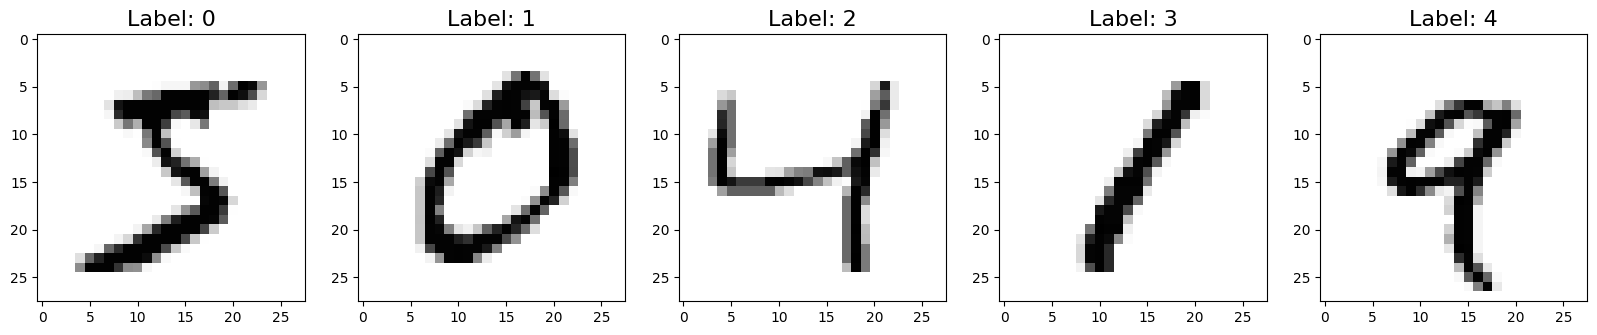

In [52]:
# 2. Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook).
# Compare these to the first five training labels.


# 1st five images of Training data set:
num_classes = 5 #set range to 5
f, ax = plt.subplots(1, 5, figsize = (20, 20))
print("First 5 images of Training data set: ")

for i in range (0, num_classes):  #for image in the range 5:
  sample = x_train[i]  #iterate through training data set for i
  ax[i].imshow(sample, cmap = 'Greys') #print the number
  ax[i].set_title("Label: {}".format(i), fontsize = 16) #add a label





First 5 images of Test data set: 


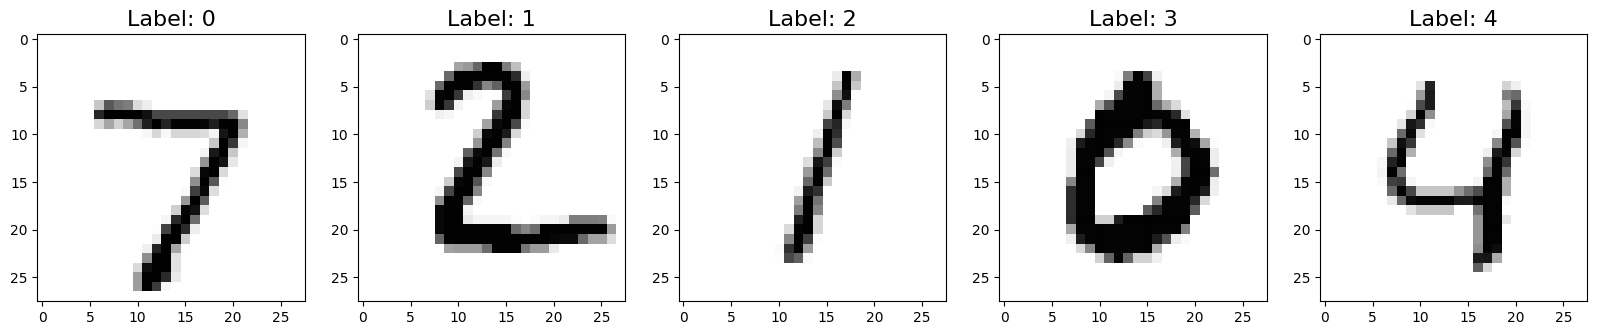

In [53]:
# 1st five images of Test data set:
num_classes = 5 #set range to 5
f, ax = plt.subplots(1, 5, figsize = (20, 20))
print("First 5 images of Test data set: ")

for i in range (0, num_classes):  #for image in the range 5:
  sample = x_test[i]  #iterate through training data set for i
  ax[i].imshow(sample, cmap = 'Greys') #print the number
  ax[i].set_title("Label: {}".format(i), fontsize = 16) #add a label


In [54]:
#3. Build and train a Keras CNN classifier on the MNIST training set.

y_train = keras.utils.to_categorical(y_train, 10) #creating vector for the y_train set
y_test = keras.utils.to_categorical(y_test, 10) #creating vector for y_test set

In [55]:
#Normalizing the data
x_train = x_train / 225.0
x_test = x_test / 225.0

#Reshaping the data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print("Training X shape: ", x_train.shape)
print("Test X shape: ", x_test.shape)

Training X shape:  (60000, 784)
Test X shape:  (10000, 784)


In [56]:
#Creating model Sequential() and adding Dense layers
model = Sequential()

model.add(Dense(units = 128, input_shape = (784,), activation = 'relu')) #input shape is shape of matrix
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25)) #allowing 25% of the training model to be excluded or dropped out
model.add(Dense(units = 10, activation = 'softmax')) #softmax assigns each class to be correct

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #adam is optimizer when making own networks

model.summary() #prints summary of model parameters, showing the total parameters, what is trainable and what is not

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
#Training the data set on the model

batch_size = 500 #creating batch size of # of images
epochs = 10 #amount of iterations

#fit the training data on the model
model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs)


#The training set shows low loss and high accuracy.
#The loss goes down on each iteration (epoch) and the accuracy increases on each iteration
#The final iteration loss is 0.0169 and the final iteration accuracy is 99.48

Epoch 1/10
120/120 [==============================] - 2s 15ms/step - loss: 0.0457 - accuracy: 0.9861
Epoch 2/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0404 - accuracy: 0.9878
Epoch 3/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0359 - accuracy: 0.9894
Epoch 4/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0330 - accuracy: 0.9900
Epoch 5/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0302 - accuracy: 0.9907
Epoch 6/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0265 - accuracy: 0.9918
Epoch 7/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 8/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 9/10
120/120 [==============================] - 2s 15ms/step - loss: 0.0178 - accuracy: 0.9946
Epoch 10/10
120/120 [==============================] - 2s 17ms/step - loss: 0.0169 - accura

In [62]:
#4. Report the test accuracy of your model.

test_loss, test_accuracy = model.evaluate(x_test, y_test) #finding the model accuracy on the test set
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_accuracy)) #printing loss and accuracy for test set


313/313 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9797
Test Loss: 0.07378990948200226, Test Accuracy: 0.9797000288963318


In [65]:
y_pred = model.predict(x_test) #array of predictions from test set
y_pred_classes = np.argmax(y_pred, axis = 1)
print("y_pred: ", y_pred) #showing probability for each class
print("y_pred_classes: ", y_pred_classes) #returning the highest probability from each class

313/313 [==============================] - 1s 2ms/step
y_pred:  [[2.91974853e-08 1.58699038e-06 3.16053479e-06 ... 9.99882519e-01
  3.20817257e-08 1.07082378e-05]
 [9.07321507e-08 2.36542951e-06 9.99996960e-01 ... 1.58657445e-11
  2.21691991e-07 1.48444076e-10]
 [1.56123406e-07 9.99862432e-01 5.57927888e-06 ... 4.07888911e-05
  4.89321574e-05 1.76157101e-07]
 ...
 [1.66161657e-14 1.81485671e-09 1.16002463e-13 ... 6.05340622e-09
  1.25292123e-08 1.23316795e-05]
 [1.71577664e-13 2.47327847e-13 6.19345356e-16 ... 1.07353566e-13
  2.35382486e-05 2.24962132e-11]
 [5.68674014e-13 8.06094490e-14 1.56346877e-15 ... 3.35063401e-20
  5.71321311e-13 5.46099057e-18]]
y_pred_classes:  [7 2 1 ... 4 5 6]


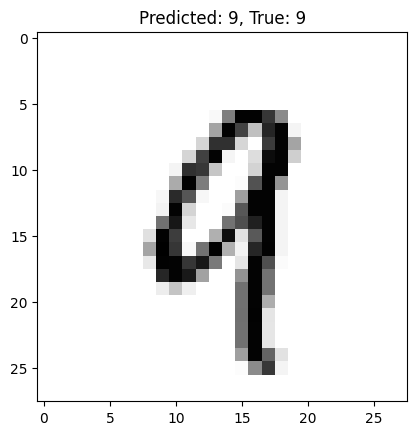

In [74]:
#Example of test, to find prediction and if it is true
random_idx = np.random.choice(len(x_test)) #getting a random index based on size of x_test
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1) #get all predictions
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_true, y_sample_pred_class), fontsize = 12)
plt.imshow(x_sample.reshape(28,28), cmap = 'Greys')

Text(70.72222222222221, 0.5, 'True')

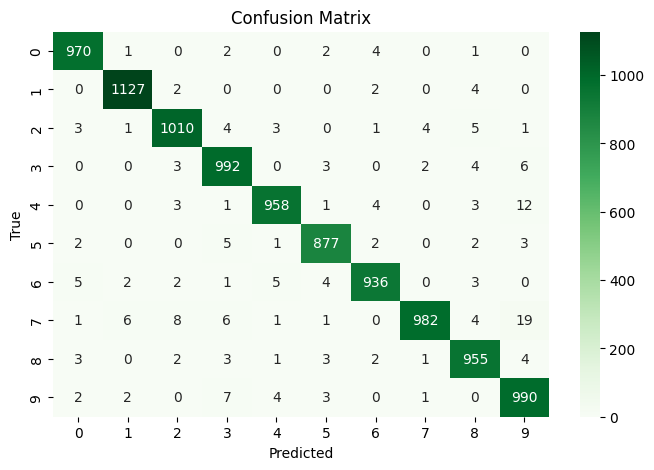

In [83]:
#5. Display a confusion matrix on the test set classifications.

confusion_mtx = confusion_matrix(y_true, y_pred_classes) #finding accuracy for every class in confusion matrix

#Visualization of confusion matrix
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = ax, cmap = "Greens") #creating heatmap of confusion matrix
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted') #Labeling x-axis
ax.set_ylabel('True') #Labeling y-axis



### 6. Summarize your results

The confusion matrix above shows how well the predicted images matched up with the actual images. The matrix shows that '1' was the most accurately predicted image with 1127 results accurately predicted and of those '1' four of those were inacurately predicted as '8'.

The confusion matrix also shows that the poorest predicted number was '5' with 877 images predicted accurately. And the image '5' was most mistaken for the image '3'.

Throughout the creation and testing of the CNN model, it was important to make sure not to over fit the model and make sure each iteration of the model had fewer losses each time and a higher accuracy each time.

> Indented block

